In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd


In [2]:
mars_df=pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')[0]

In [3]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [4]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [5]:
from datetime import datetime
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

In [6]:
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [7]:
#How many months exist on Mars?
mars_df["month"].nunique()

12

In [8]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_df["sol"].nunique()

1867

In [9]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
temp_average = mars_df.groupby('month')['min_temp'].mean()
temp_average

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [10]:
#Coldest month
temp_average.idxmin()

3

In [11]:
#Warmest Month
temp_average.idxmax()

8

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt


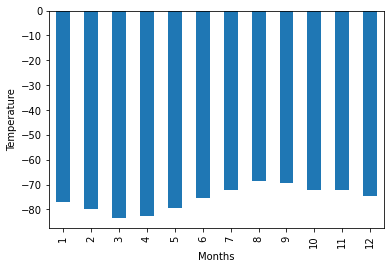

In [13]:
temp_chart = temp_average.plot(kind='bar')
temp_chart.set_xlabel("Months")
temp_chart.set_ylabel("Temperature")


plt.show()

As we see at the plot On Mars Month 3 is the coldest and Month 8 is the warmest months in Mars.

In [17]:
pressure_average = mars_df.groupby('month')['pressure'].mean()
print(pressure_average)
print(pressure_average.idxmin())
print(pressure_average.idxmax())

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64
6
9


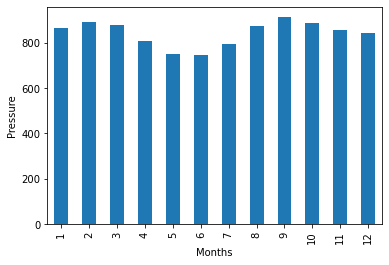

In [18]:
pressure_chart = pressure_average.plot(kind='bar')
pressure_chart.set_xlabel("Months")
pressure_chart.set_ylabel("Pressure")


plt.show()

As we see at the plot On Mars Month 6 has the lowest pressure and Month 9 has the highest pressure in Mars.

Text(0.5, 1.0, 'Earth Days in Martian Days')

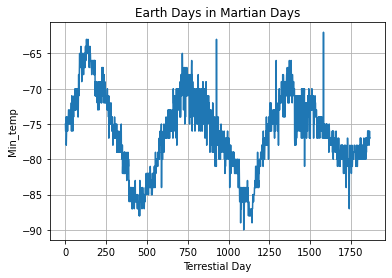

In [15]:
mars_df.min_temp.plot()
plt.grid()
plt.xlabel('Terrestial Day')
plt.ylabel('Min_temp')
plt.title("Earth Days in Martian Days")

Text(0.5, 1.0, 'Earth Days in Martian Days')

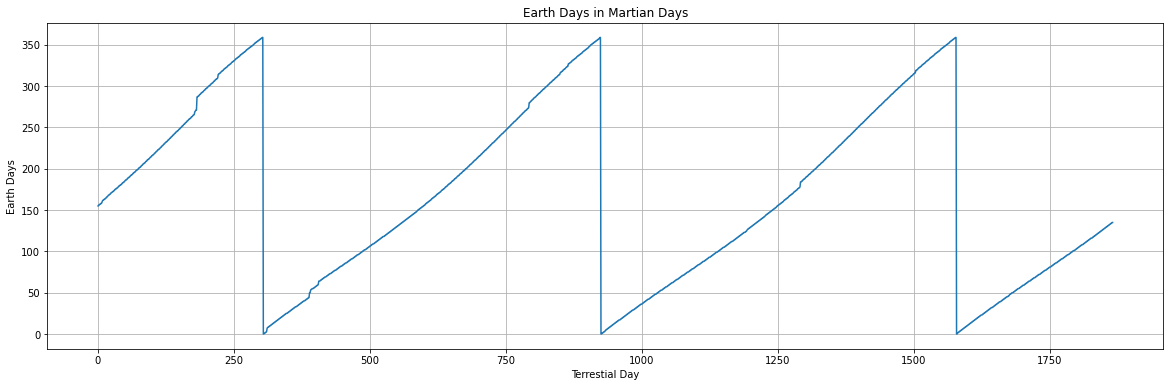

In [22]:
mars_df.ls.plot(figsize=(20,6))
plt.grid()
plt.xlabel('Terrestial Day')
plt.ylabel('Earth Days')
plt.title("Earth Days in Martian Days")

In [23]:
mars_df[mars_df['ls']==0]['sol']

304      351
305      352
925     1019
926     1020
1579    1688
1580    1689
Name: sol, dtype: int64

In [25]:
1020-352

668

In [26]:
1689-1020

669

By examining the charts, roughly there are around 670 Earth days in one Martian year. 

In [16]:
Mission_To_Mars_Database = "Mission_To_Mars_Database.csv"

mars_df.to_csv(Mission_To_Mars_Database, index_label="Mission_To_Mars_Database")
